In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Clustering Analysis on the risk-level-increased data

In [22]:
df_zero_final = pd.read_csv('data/df_merged_zero_15x15_final.csv')
df_zero_final

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,ukc1101-06000,2020-05-14,0,0.014399,0.648437,9.016005,0.720255,1.359252,26.936116,0.014399,...,5.846387,0.720255,1.359252,26.936116,0.014399,0.648437,5.846387,0.720255,1.359252,26.936116
1,ukc1101-06000,2020-05-15,0,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528,0.000000,...,8.102808,0.393628,1.778462,10.588528,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528
2,ukc1101-06000,2020-05-16,0,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908,0.000000,...,1.135922,0.263305,2.588783,5.632908,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908
3,ukc1101-06000,2020-05-17,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ukc1101-06000,2020-05-18,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,ukk4307-33900,2022-09-26,0,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081,0.000000,...,7.356489,0.183889,3.869243,3.158081,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081
187107,ukk4307-33900,2022-09-27,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187108,ukk4307-33900,2022-09-28,0,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839,0.000000,...,4.906127,0.142344,5.219365,2.063839,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839
187109,ukk4307-33900,2022-09-29,0,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730,0.000000,...,9.181858,0.151466,4.857575,2.291730,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730


In [2]:
df_feature = pd.read_csv('data/feature_extraction_15x15.csv')
riskforecasting = pd.read_csv('data/pollution_risk_forecasting.csv')
df_merged_15x15 = pd.merge(df_feature, riskforecasting[['site', 'time', 'riskLevelLabel']], on=['site', 'time'])
df_merged_15mean_raw = df_merged_15x15[df_merged_15x15['riskLevelLabel'] == 1]
X_15mean_raw = df_merged_15mean_raw.iloc[:, 176:182]
X_15mean_raw.dropna(inplace=True)
X_15mean_raw

,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
392,0.015408,0.249985,3.531315,0.207090,3.572845,3.914695
813,0.007234,0.101324,3.442246,0.238778,3.510525,5.191815
1234,0.006205,0.091121,1.927018,0.146031,5.145323,2.167765
9275,0.002986,0.039705,1.283574,0.142911,5.236460,2.083618
9276,0.002987,0.039723,1.295786,0.141153,5.311809,2.040467
...,...,...,...,...,...,...
186609,0.005212,0.052180,0.810492,0.116814,7.345041,1.534649
186610,0.007043,0.022616,1.744973,0.100035,8.203893,1.141540
186617,0.007291,0.022990,1.804538,0.117367,6.822875,1.508444
186619,0.007469,0.024174,1.846479,0.124488,6.441228,1.682777


In [3]:
X_15mean_raw_all_withNaN = df_merged_15x15.iloc[:, list(range(176, 182)) + [-1]]
X_15mean_raw_all = X_15mean_raw_all_withNaN.dropna()
# X_15mean_all_scaled = X_15mean_raw_all.copy()



# std = StandardScaler()
# X_15mean_all_scaled.iloc[:, :-1] = std.fit_transform(X_15mean_all_scaled.iloc[:, :-1])
# X_15mean_scaled = X_15mean_all_scaled[X_15mean_all_scaled['riskLevelLabel']==1]
# X_15mean_scaled = X_15mean_scaled.iloc[:, :-1]
# X_15mean_scaled

In [8]:
X_15mean_raw_normal = X_15mean_raw_all[X_15mean_raw_all['riskLevelLabel']==0]
std = StandardScaler()
X_15mean_raw_normal.iloc[:, :-1] = std.fit(X_15mean_raw_normal.iloc[:, :-1])
X_15mean_raw_increased = X_15mean_raw_all[X_15mean_raw_all['riskLevelLabel']==1]
X_15mean_raw_increased.iloc[:, :-1] = std.transform(X_15mean_raw_increased.iloc[:, :-1])
X_15mean_scaled = X_15mean_raw_increased.copy()
X_15mean_scaled

C:\Users\ZaCHarY Lu\AppData\Local\Temp\ipykernel_12472\2085920714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_15mean_raw_normal.iloc[:, :-1] = std.fit(X_15mean_raw_normal.iloc[:, :-1])
C:\Users\ZaCHarY Lu\AppData\Local\Temp\ipykernel_12472\2085920714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_15mean_raw_increased.iloc[:, :-1] = std.transform(X_15mean_raw_increased.iloc[:, :-1])


,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean,riskLevelLabel
392,-0.248709,0.465520,-0.280378,-0.003336,-0.422075,-0.106828,1
813,-0.647715,-0.570597,-0.287673,0.310598,-0.447884,0.230568,1
1234,-0.697966,-0.641709,-0.411770,-0.608257,0.229143,-0.568340,1
9275,-0.855068,-1.000061,-0.464468,-0.639174,0.266886,-0.590570,1
9276,-0.855040,-0.999935,-0.463468,-0.656583,0.298091,-0.601970,1
...,...,...,...,...,...,...,...
186609,-0.746407,-0.913118,-0.503214,-0.897722,1.140123,-0.735600,1
186610,-0.657059,-1.119163,-0.426680,-1.063953,1.495804,-0.839453,1
186617,-0.644944,-1.116557,-0.421802,-0.892242,0.923876,-0.742523,1
186619,-0.636257,-1.108307,-0.418367,-0.821688,0.765823,-0.696466,1


In [9]:
within_cluster_distance = []
silhouette_scores = {}
for cluster_number in range(2,15):
    kmeans = KMeans(n_clusters=cluster_number, max_iter=1000, n_init=50, random_state=100)
    kmeans.fit(X_15mean_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_15mean_scaled, labels)
    silhouette_scores[cluster_number] = score
    print("For {0} clusters, silhouette score is {1}".format(cluster_number, score))
    within_cluster_distance.append(kmeans.inertia_)
        
best_cluster_number = max(silhouette_scores, key=silhouette_scores.get)
print()
print(f'Consider K-means clustering with K = {best_cluster_number}')

For 2 clusters, silhouette score is 0.43423148319439114
For 3 clusters, silhouette score is 0.3580966732093749
For 4 clusters, silhouette score is 0.35783351047695716
For 5 clusters, silhouette score is 0.36151061293465003
For 6 clusters, silhouette score is 0.3613268103044122
For 7 clusters, silhouette score is 0.3322122598045597
For 8 clusters, silhouette score is 0.3349323712193686
For 9 clusters, silhouette score is 0.33908037574734884
For 10 clusters, silhouette score is 0.3425580992291023
For 11 clusters, silhouette score is 0.2990211290234942
For 12 clusters, silhouette score is 0.2967278780164223
For 13 clusters, silhouette score is 0.28801878992561425
For 14 clusters, silhouette score is 0.28920850017792643

Consider K-means clustering with K = 2


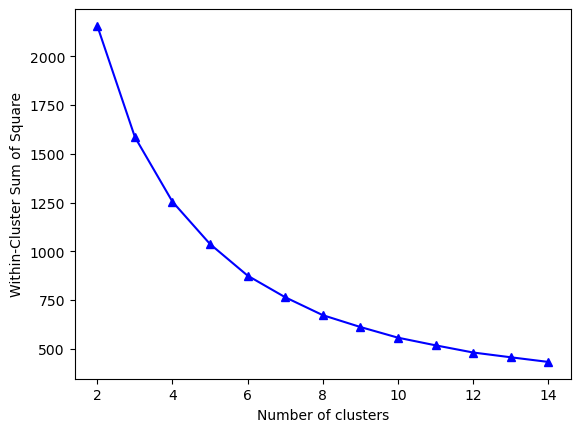

In [11]:
#Draw the Elbow curve
plt.plot(range(2,15),within_cluster_distance,'b^-')
# plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.savefig('results/Kmeans_Elbow.png')
plt.show()

In [14]:
#Fit the model with 2 clusters
kmeans = KMeans(n_clusters=2, max_iter=1000, n_init=50, random_state=100)
kmeans.fit(X_15mean_scaled)
X_15mean_scaled['cluster'] = kmeans.labels_ + 1
X_15mean_raw['cluster'] = kmeans.labels_ + 1
# df_increased_15_noNan['cluster'] = kmeans.labels_ + 1
X_15mean_raw

,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean,cluster
392,0.015408,0.249985,3.531315,0.207090,3.572845,3.914695,2
813,0.007234,0.101324,3.442246,0.238778,3.510525,5.191815,2
1234,0.006205,0.091121,1.927018,0.146031,5.145323,2.167765,2
9275,0.002986,0.039705,1.283574,0.142911,5.236460,2.083618,2
9276,0.002987,0.039723,1.295786,0.141153,5.311809,2.040467,2
...,...,...,...,...,...,...,...
186609,0.005212,0.052180,0.810492,0.116814,7.345041,1.534649,2
186610,0.007043,0.022616,1.744973,0.100035,8.203893,1.141540,2
186617,0.007291,0.022990,1.804538,0.117367,6.822875,1.508444,2
186619,0.007469,0.024174,1.846479,0.124488,6.441228,1.682777,2


In [15]:
X_15mean_raw["cluster"].value_counts()

2    386
1    202
Name: cluster, dtype: int64

In [16]:
pca = PCA(2)
X_15mean_scaled_2d = pd.DataFrame(pca.fit_transform(X_15mean_scaled),columns = ['PC1','PC2'])
X_15mean_scaled_2d['cluster'] = kmeans.labels_ + 1
X_15mean_scaled_2d

,PC1,PC2,cluster
0,-0.338924,0.823730,2
1,-0.636935,1.034642,2
2,-1.606628,0.193138,2
3,-1.857564,0.176959,2
4,-1.879414,0.153857,2
...,...,...,...
583,-2.292516,-0.291573,2
584,-2.523047,-0.646783,2
585,-2.192603,-0.344364,2
586,-2.080834,-0.245704,2


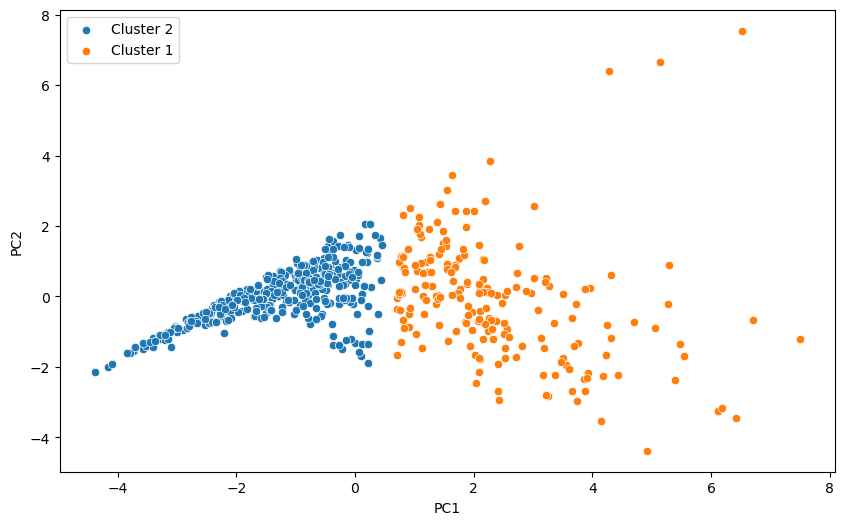

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
clusters = X_15mean_scaled_2d['cluster'].unique()
for cluster in clusters:
    data = X_15mean_scaled_2d[X_15mean_scaled_2d['cluster'] == cluster]
    sns.scatterplot(x='PC1', y='PC2', data=data, label=f'Cluster {cluster}')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.title('Scatter Plot for Clusters')
plt.savefig('results/Kmeans——scatter.png')
plt.show()

In [20]:
means_cluster = X_15mean_raw.groupby('cluster').mean()
means_cluster_scaled = (means_cluster - std.mean_) / std.scale_
means_cluster_scaled

,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
cluster,,,,,,
1,1.297715,0.803656,1.641672,0.845054,-0.833487,0.699317
2,-0.265615,-0.462346,-0.250534,-0.450464,0.362964,-0.419676


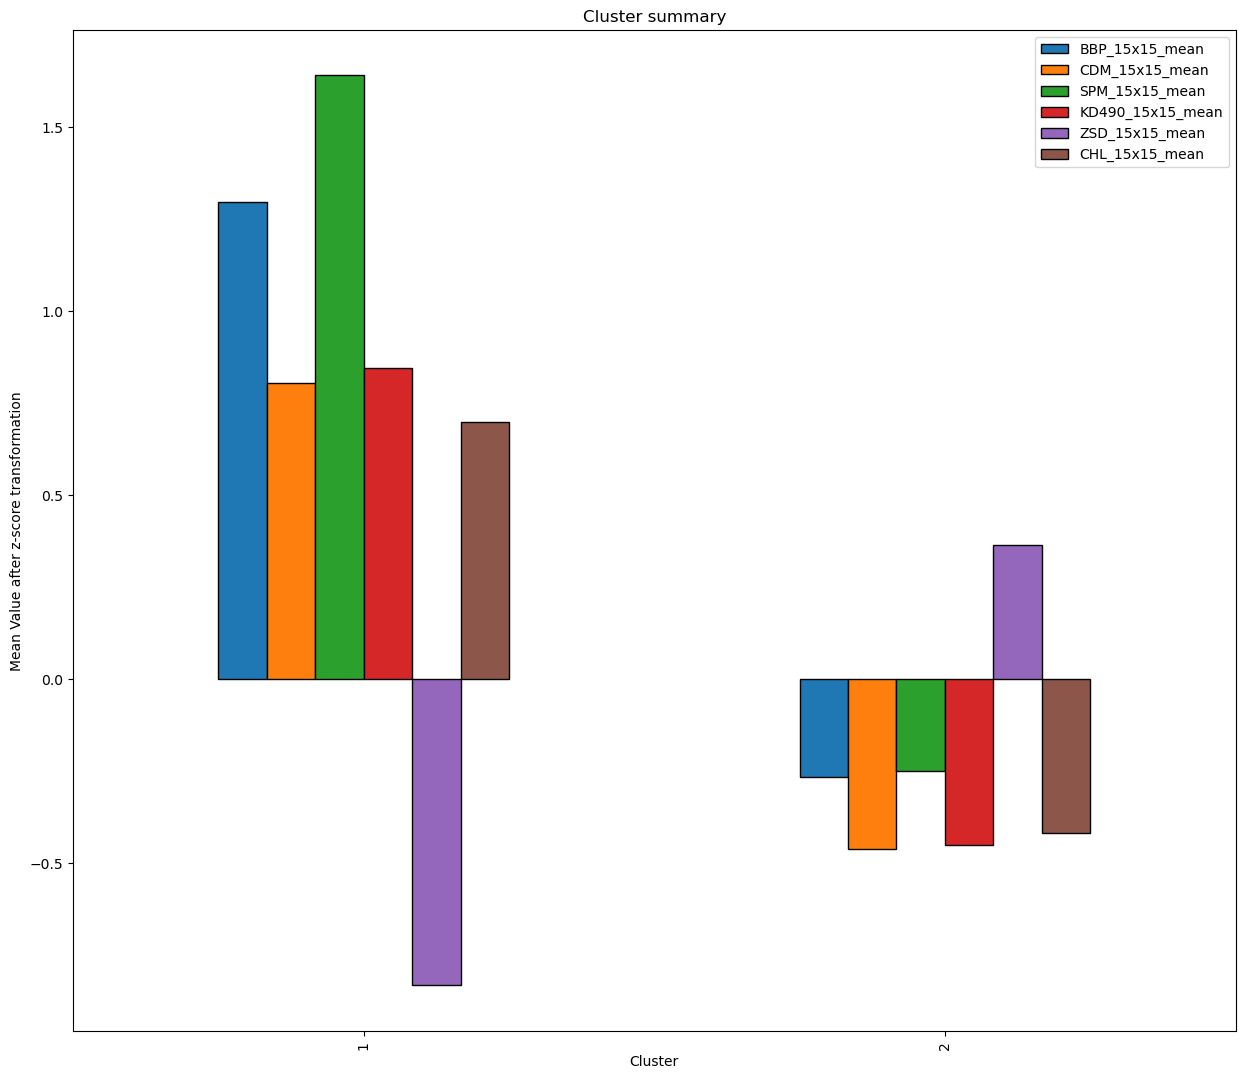

In [21]:
ax = means_cluster_scaled.plot(kind='bar', edgecolor="black", figsize=(15, 13), title='Cluster summary')
for p in ax.containers:
    for patch in p.patches:
        height = patch.get_height()
plt.legend()
plt.xlabel('Cluster')
plt.ylabel('Mean Value after z-score transformation')
# plt.title('Details in each Cluster')
plt.savefig('results/Kmeans_cluster_detail.png')
plt.show()

## Saving test_with_cluster.csv

In [23]:
test_labels_mean_zero = pd.read_csv('data/test_labels_mean_zero.csv')[['time', 'site']]

In [24]:
df_increased = df_merged_15x15[df_merged_15x15['riskLevelLabel'] == 1]

In [25]:
df_increased_15 = df_increased.iloc[:, list(range(2)) + list(range(176, 182)) + [-1]]
df_increased_15_noNan = df_increased_15.dropna()

In [26]:
X_15mean_scaled = df_increased_15_noNan.copy()
std = StandardScaler()
X_15mean_scaled.iloc[:, 2:-1] = std.fit_transform(X_15mean_scaled.iloc[:,2 :-1])

In [27]:
#Fit the model with 2 clusters
kmeans = KMeans(n_clusters=2, max_iter=1000, n_init=50, random_state=100)
kmeans.fit(X_15mean_scaled.iloc[:, 2:-1])
df_increased_15_noNan['cluster'] = kmeans.labels_ + 1
df_increased_15_noNan

C:\Users\ZaCHarY Lu\AppData\Local\Temp\ipykernel_12472\2761430125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_increased_15_noNan['cluster'] = kmeans.labels_ + 1


,time,site,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean,riskLevelLabel,cluster
392,2020-05-14,ukk4304-34200,0.015408,0.249985,3.531315,0.207090,3.572845,3.914695,1,2
813,2020-05-15,ukk4304-34200,0.007234,0.101324,3.442246,0.238778,3.510525,5.191815,1,2
1234,2020-05-16,ukk4304-34200,0.006205,0.091121,1.927018,0.146031,5.145323,2.167765,1,2
9275,2020-06-05,ukc1202-06650,0.002986,0.039705,1.283574,0.142911,5.236460,2.083618,1,2
9276,2020-06-05,ukc1202-06700,0.002987,0.039723,1.295786,0.141153,5.311809,2.040467,1,2
...,...,...,...,...,...,...,...,...,...,...
186609,2022-09-29,ukk3106-28400,0.005212,0.052180,0.810492,0.116814,7.345041,1.534649,1,2
186610,2022-09-29,ukk3106-32100,0.007043,0.022616,1.744973,0.100035,8.203893,1.141540,1,2
186617,2022-09-29,ukk3106-32340,0.007291,0.022990,1.804538,0.117367,6.822875,1.508444,1,2
186619,2022-09-29,ukk3106-32500,0.007469,0.024174,1.846479,0.124488,6.441228,1.682777,1,2


In [28]:
pair_with_cluster = df_increased_15_noNan.iloc[:, [0]+[1]+[-2]+[-1]]
pair_with_cluster

,time,site,riskLevelLabel,cluster
392,2020-05-14,ukk4304-34200,1,2
813,2020-05-15,ukk4304-34200,1,2
1234,2020-05-16,ukk4304-34200,1,2
9275,2020-06-05,ukc1202-06650,1,2
9276,2020-06-05,ukc1202-06700,1,2
...,...,...,...,...
186609,2022-09-29,ukk3106-28400,1,2
186610,2022-09-29,ukk3106-32100,1,2
186617,2022-09-29,ukk3106-32340,1,2
186619,2022-09-29,ukk3106-32500,1,2


In [29]:
clusters_in_test = pair_with_cluster.merge(test_labels_mean_zero, on=['time', 'site'], how='inner')
clusters_in_test

,time,site,riskLevelLabel,cluster
0,2020-05-14,ukk4304-34200,1,2
1,2020-06-05,ukc1202-06650,1,2
2,2020-06-11,ukk4306-22800,1,2
3,2020-06-22,ukk3106-27100,1,2
4,2020-06-23,ukk3102-31600,1,2
...,...,...,...,...
102,2022-09-29,ukc2103-04600,1,2
103,2022-09-29,ukc2203-04900,1,2
104,2022-09-29,ukd4200-42300,1,1
105,2022-09-29,ukd4200-42500,1,1


In [30]:
clusters_in_test = clusters_in_test.iloc[:, [0]+[1]+[3]]
clusters_in_test

,time,site,cluster
0,2020-05-14,ukk4304-34200,2
1,2020-06-05,ukc1202-06650,2
2,2020-06-11,ukk4306-22800,2
3,2020-06-22,ukk3106-27100,2
4,2020-06-23,ukk3102-31600,2
...,...,...,...
102,2022-09-29,ukc2103-04600,2
103,2022-09-29,ukc2203-04900,2
104,2022-09-29,ukd4200-42300,1
105,2022-09-29,ukd4200-42500,1


In [31]:
test_with_cluster = pd.merge(df_zero_final, clusters_in_test[['site', 'time', 'cluster']], on=['site', 'time'], how='inner')
test_with_cluster = test_with_cluster[test_with_cluster['riskLevelLabel']!=0]
test_with_cluster

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3,cluster
0,ukc1202-06650,2020-06-05,1,0.002986,0.039705,1.283574,0.149732,4.921273,2.247580,0.002986,...,0.142911,5.236460,2.083618,0.002986,0.039705,1.283574,0.142911,5.236460,2.083618,2
1,ukc1202-06700,2020-08-24,1,0.002458,0.093960,2.077496,0.183432,4.100962,3.201868,0.002458,...,0.183432,4.068698,3.201868,0.002458,0.093960,2.077496,0.183432,4.100962,3.201868,2
2,ukc2103-04600,2020-08-24,1,0.004586,0.026278,3.875391,0.174393,4.114664,2.894618,0.004586,...,0.128400,6.233653,1.770035,0.004586,0.026278,1.813883,0.128400,6.233653,1.770035,2
3,ukc2103-04600,2022-09-29,1,0.020971,0.146831,6.199709,0.188662,3.752482,3.292190,0.020971,...,0.190572,3.707183,3.348240,0.020266,0.123182,5.114015,0.191137,3.709506,3.366300,2
4,ukc2103-04700,2020-08-24,1,0.004586,0.026278,1.880023,0.131147,6.193217,1.846722,0.004586,...,0.131147,6.144756,1.846722,0.004586,0.026278,1.880023,0.131147,6.193217,1.846722,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,ukk4304-34700,2022-09-26,1,0.042722,0.116843,8.494947,0.205334,3.423756,3.785667,0.042722,...,0.205334,3.423756,3.785667,0.042722,0.116843,8.494947,0.205334,3.423756,3.785667,2
102,ukk4304-34800,2020-08-18,1,0.044307,0.185059,7.211779,0.190118,3.757423,3.347346,0.044307,...,0.185305,3.757423,3.197144,0.044307,0.185059,10.558348,0.190118,3.831927,3.347346,2
104,ukk4305-26200,2021-06-23,1,0.003192,0.072590,0.261229,0.125868,6.125638,1.685297,0.003192,...,0.124253,6.125638,1.637736,0.003192,0.072590,0.468821,0.125868,6.125638,1.685297,2
105,ukk4306-22800,2020-06-11,1,0.015995,0.057877,5.296386,0.120047,6.405754,1.545960,0.015995,...,0.120047,6.405754,1.545960,0.015995,0.057877,5.296386,0.120047,6.405754,1.545960,2


In [32]:
test_with_cluster.to_csv('data/test_with_cluster.csv')